# Climb Graphs

Load strava profile and plot the climb. 

https://www.routeyou.com/nl-be/route/view/12143652/racefietsroute/we-ride-flanders-2023-242-km?c=By4rO9AtU40hzNMS


https://www.strava.com/segments/25835330

https://www.strava.com/stream/segments/25835330?streams%5B%5D=latlng&streams%5B%5D=distance&streams%5B%5D=altitude&_=1679795135855


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import math

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [12]:
flagstaff = pd.read_json("strava/flagstaff.json")
kwaremont = pd.read_json("strava/oude_kwaremont.json")
flagstaff

,latlng,distance,altitude
0,"[39.99931, -105.290627]",0.0,1744.6
1,"[39.999435, -105.290726]",16.6,1746.1
2,"[39.999485, -105.290741]",22.2,1746.4
3,"[39.999588, -105.290733]",34.0,1746.6
4,"[40.000076, -105.290573]",89.8,1747.8
...,...,...,...
165,"[39.997696, -105.308296]",4554.8,2053.0
166,"[39.99754, -105.308517]",4580.7,2053.4
167,"[39.997337, -105.308754]",4610.9,2053.4
168,"[39.997311, -105.308792]",4615.0,2052.3


<IPython.core.display.Javascript object>

In [84]:
def clean_profile(df, segment_distance=250):
    """
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        Raw DataFrame from Strava data
    segment_distance : float
        Distance (m) to create segments

    Returns
    -------
    pandas.core.frame.DataFrame
        Cleaned up DataFrame
    """
    df = df.rolling(window=4, min_periods=1).mean()
    df["ascent"] = df.altitude - df.altitude[0]
    df["gradient"] = (df.altitude.diff() / df.distance.diff()) * 100

    #     The first row gets dropped
    df.gradient = df.gradient.bfill()
    df["segment"] = df.distance // 250

    df = df.merge(
        right=df[["segment", "gradient"]]
        .groupby("segment")
        .mean()
        .reset_index()
        .rename(columns={"gradient": "segment_average_gradient"}),
        on="segment",
    )
    return df


df = clean_profile(kwaremont)
df

,distance,altitude,ascent,gradient,segment,segment_average_gradient
0,0.000000,16.00,0.00,0.000000,0.0,0.000000
1,23.450000,16.00,0.00,0.000000,0.0,0.000000
2,47.066667,16.00,0.00,0.000000,0.0,0.000000
3,70.650000,16.00,0.00,0.000000,0.0,0.000000
4,117.475000,16.00,0.00,0.000000,0.0,0.000000
...,...,...,...,...,...,...
226,2357.975000,104.95,88.95,4.878049,9.0,4.997984
227,2367.650000,105.35,89.35,4.134367,9.0,4.997984
228,2386.325000,105.75,89.75,2.141901,9.0,4.997984
229,2413.525000,106.10,90.10,1.286765,9.0,4.997984


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='segment', ylabel='ascent'>

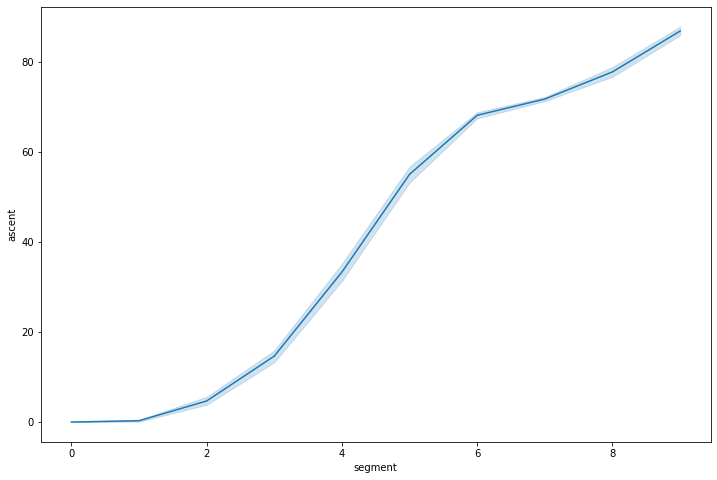

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=df, x="segment", y="ascent")

In [88]:
df.segment_average_gradient.value_counts()

9.249704    43
8.790139    43
5.271294    28
4.480823    25
3.401806    24
4.997984    19
2.645955    16
1.602263    13
0.626219    12
0.000000     8
Name: segment_average_gradient, dtype: int64

<IPython.core.display.Javascript object>

In [94]:
df["segment_gradient_max"] = pd.cut(
    df.segment_average_gradient, bins=[-0.1, 3, 6, 9, 12], labels=[3, 6, 9, 12]
)

<IPython.core.display.Javascript object>

In [95]:
df

,distance,altitude,ascent,gradient,segment,segment_average_gradient,segment_gradient_max
0,0.000000,16.00,0.00,0.000000,0.0,0.000000,3
1,23.450000,16.00,0.00,0.000000,0.0,0.000000,3
2,47.066667,16.00,0.00,0.000000,0.0,0.000000,3
3,70.650000,16.00,0.00,0.000000,0.0,0.000000,3
4,117.475000,16.00,0.00,0.000000,0.0,0.000000,3
...,...,...,...,...,...,...,...
226,2357.975000,104.95,88.95,4.878049,9.0,4.997984,6
227,2367.650000,105.35,89.35,4.134367,9.0,4.997984,6
228,2386.325000,105.75,89.75,2.141901,9.0,4.997984,6
229,2413.525000,106.10,90.10,1.286765,9.0,4.997984,6


<IPython.core.display.Javascript object>

In [81]:
df = df.merge(
    right=df[["segment", "gradient"]]
    .groupby("segment")
    .mean()
    .reset_index()
    .rename(columns={"gradient": "segment_average_gradient"}),
    on="segment",
)

<IPython.core.display.Javascript object>

In [66]:
df.distance // 250

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
226    9.0
227    9.0
228    9.0
229    9.0
230    9.0
Name: distance, Length: 231, dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sns.lineplot(data=x, x="distance", y="altitude", hue="gradient_bin")

ValueError: Could not interpret value `gradient_bin` for parameter `hue`

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='distance', ylabel='altitude'>

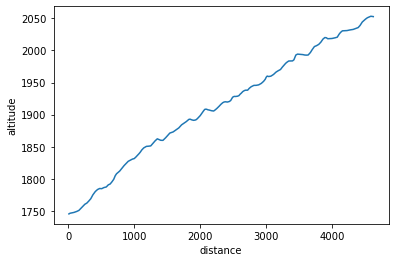

<IPython.core.display.Javascript object>

In [10]:
selection = flagstaff.rolling(window=3, min_periods=1, center=True).mean()


sns.lineplot(data=selection, x="distance", y="altitude")

<AxesSubplot:xlabel='energy_spent', ylabel='total_time'>

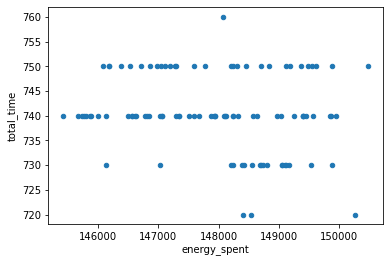

<IPython.core.display.Javascript object>

In [92]:
df.plot.scatter(x="energy_spent", y="total_time")

<AxesSubplot:>

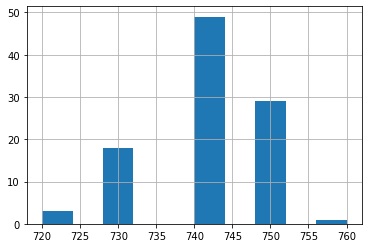

<IPython.core.display.Javascript object>

In [93]:
df.total_time.hist()

In [97]:
(flagstaff.altitude.diff() / flagstaff.distance.diff()).describe()

count    169.000000
mean       0.066405
std        0.126516
min       -0.468085
25%        0.000000
50%        0.055785
75%        0.128889
max        0.436364
dtype: float64

<IPython.core.display.Javascript object>

In [99]:
flagstaff

,latlng,distance,altitude,gradient
0,"[39.99931, -105.290627]",0.0,1744.6,7.6
1,"[39.999435, -105.290726]",16.6,1746.1,7.6
2,"[39.999485, -105.290741]",22.2,1746.4,5.9
3,"[39.999588, -105.290733]",34.0,1746.6,2.3
4,"[40.000076, -105.290573]",89.8,1747.8,2.1
...,...,...,...,...
165,"[39.997696, -105.308296]",4554.8,2053.0,4.2
166,"[39.99754, -105.308517]",4580.7,2053.4,4.7
167,"[39.997337, -105.308754]",4610.9,2053.4,-1.2
168,"[39.997311, -105.308792]",4615.0,2052.3,-0.7


<IPython.core.display.Javascript object>

{500: 2.1, 1000: 5.7, 1500: 3.9, 2000: 7.2, 99999: 0}

<IPython.core.display.Javascript object>

In [102]:
flagstaff_gradients = {r.distance: r.gradient for r in flagstaff.itertuples()}
flagstaff_gradients

{0.0: 7.6,
 16.600000000000364: 7.6,
 22.200000000000728: 5.9,
 34.0: 2.3,
 89.80000000000109: 2.1,
 129.20000000000073: 3.6,
 163.10000000000036: 4.9,
 185.60000000000036: 10.7,
 219.8000000000011: 10.5,
 251.0: 10.7,
 278.39999999999964: 6.0,
 309.8000000000011: 10.8,
 336.8000000000011: 11.9,
 372.3000000000011: 19.0,
 405.60000000000036: 14.0,
 447.5: 9.2,
 473.39999999999964: 4.9,
 500.89999999999964: -0.9,
 540.6000000000004: 5.1,
 574.8000000000011: 2.6,
 607.8999999999996: 10.9,
 632.7000000000007: 4.6,
 657.8000000000011: 12.5,
 688.1000000000004: 14.5,
 714.5: 24.2,
 727.1000000000004: 15.5,
 747.6000000000004: 9.1,
 771.6000000000004: 8.6,
 812.0: 13.0,
 844.3999999999996: 12.5,
 876.2000000000007: 11.0,
 903.6000000000004: 10.3,
 940.1000000000004: 5.3,
 975.0: 5.6,
 996.2000000000007: 2.9,
 1020.8000000000011: 9.4,
 1044.3999999999996: 11.0,
 1068.800000000001: 11.0,
 1098.7000000000007: 12.5,
 1102.800000000001: 15.0,
 1135.6000000000004: 10.9,
 1185.300000000001: 5.9,
 1

<IPython.core.display.Javascript object>

# Run on real data 

In [46]:
# run(gradients=flagstaff_gradients)

<IPython.core.display.Javascript object>

In [105]:
data = [run(gradients=flagstaff_gradients) for i in range(100)]

df = pd.DataFrame(data)
df.describe()

,dist_traveled,total_time,energy_spent
count,100.000000,100.000000,100.000000
mean,4699.657540,1268.000000,253725.511417
std,45.631813,25.105837,4782.315162
min,4622.140874,1200.000000,241498.910175
25%,4693.557662,1250.000000,250572.417793
50%,4697.910347,1270.000000,253460.672747
75%,4706.765609,1290.000000,257474.314503
max,4804.161273,1330.000000,265541.543444


<IPython.core.display.Javascript object>

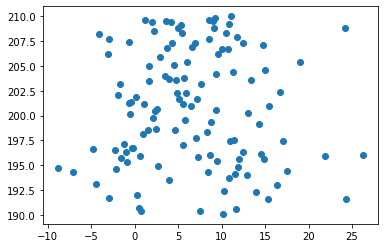

<IPython.core.display.Javascript object>

In [106]:
sel = df[df.energy_spent < df.energy_spent.mean()]

p = sel[sel.total_time == sel.total_time.min()].head(1).power_profile.values[0]

plt.scatter(p.keys(), p.values())

# Set up an optimization problem 

Alow input vector of length 170. Sum up the time taken.

In [144]:
from scipy.optimize import LinearConstraint


# Sum of power is capped

linear_constraint = LinearConstraint([[1] * 170], lb=[1], ub=[200 * 170])

<IPython.core.display.Javascript object>

In [163]:
def run(gradients, power_profile):

    D = 4622  # meters
    dt = 10  # secs
    dist_traveled = 0
    energy_spent = 0
    total_time = 0
    power_profile_list = []
    for i in range(9999):
        #         P = 200 + np.random.rand() * 10 - 5
        for dist, g in gradients.items():
            if dist_traveled < dist:
                gradient = g
                break
        P = power_profile[gradient]
        power_profile_list.append(P)
        v = power_to_speed(P, g)
        dist_traveled += v * dt
        energy_spent += P * dt
        total_time += dt
        #         print(f"P={P}, g={g}, D={D}, v={v}")
        if dist_traveled > D:
            break
    return {
        "dist_traveled": dist_traveled,
        "total_time": total_time,
        "energy_spent": energy_spent,
        "power_profile": power_profile,
    }

<IPython.core.display.Javascript object>

In [164]:
def minimize_me(powers):
    """Calculate power loss given ground speed velocity and angle

    Parameters
    ----------
    powers : list
        list of powers

    Returns
    -------
    float
        Total time (s)

    """
    power_profile = dict(zip(flagstaff_gradients.values(), powers))
    result = run(gradients=flagstaff_gradients, power_profile=power_profile)

    return result["total_time"]

<IPython.core.display.Javascript object>

In [169]:
minimize_me([200] * 170)

1320

<IPython.core.display.Javascript object>

In [174]:
minimize_me([299] * 170)

890

<IPython.core.display.Javascript object>

In [177]:
optimize.minimize(
    fun=minimize_me, x0=np.array([177] + [199] * 169), constraints=linear_constraint
)

     fun: 1240.0
     jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 171
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([177., 199., 199., 199., 199., 199., 199., 199., 199., 199., 199.,
       199., 199., 199., 

<IPython.core.display.Javascript object>